# Proyek Analisis Data: BIKE SHARING DATASET
- **Nama:** Novena Putri Antonia Sihombing
- **Email:** novenaputri08@gmail.com
- **ID Dicoding:** novena_09

## Menentukan Pertanyaan Bisnis

- Bagaimana Hubungan antara suhu dan jumlah sepeda yang disewa per jam?
- Bagaimana pengaruh musim dan suhu terhadap jumlah penyewaaan sepeda harian

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Data Wrangling

### Gathering Data

In [ ]:
hour_data = pd.read_csv('hour.csv')
day_data = pd.read_csv('day.csv')

### Assessing Data

In [ ]:
#check for missing values
print (hour_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
print (day_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
#check data types
print(hour_data.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [ ]:
print(day_data.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


### Cleaning Data

In [ ]:
#handle missing values (if any)
for col in hour_data.columns:
  if hour_data[col].dtype in['int','float']:
    hour_data[col].fillna(hour_data[col].mean(), inplace=True)


    for col in day_data.columns:
      if day_data[col].dtype in ['int','float']:
        day_data[col].fillna(day_data[col].mean(),inplace=True)

## Exploratory Data Analysis (EDA)

### Explore

>day_data




```



In [ ]:
day_data.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
225,226,2011-08-14,3,0,8,0,0,0,2,0.676667,0.624388,0.817500,0.222633,1338,2482,3820
42,43,2011-02-12,1,0,2,0,6,0,1,0.222500,0.232954,0.544167,0.203367,288,1184,1472
300,301,2011-10-28,4,0,10,0,5,1,2,0.330833,0.318812,0.585833,0.229479,456,3291,3747
578,579,2012-08-01,3,1,8,0,3,1,1,0.717500,0.667308,0.677500,0.141179,1074,6506,7580
664,665,2012-10-26,4,1,10,0,5,1,2,0.545833,0.522750,0.807083,0.132467,1182,6262,7444
609,610,2012-09-01,3,1,9,0,6,0,2,0.753333,0.702654,0.638333,0.113187,2352,3788,6140
318,319,2011-11-15,4,0,11,0,2,1,2,0.530000,0.507579,0.688750,0.199633,449,3746,4195
433,434,2012-03-09,1,1,3,0,5,1,2,0.410833,0.397083,0.407083,0.414800,447,4122,4569
48,49,2011-02-18,1,0,2,0,5,1,1,0.521667,0.511983,0.516667,0.264925,579,2348,2927
90,91,2011-04-01,2,0,4,0,5,1,2,0.300000,0.283454,0.686250,0.258708,307,1920,2227


In [ ]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_data.mnth.value_counts()

,count
mnth,
1,62
3,62
5,62
7,62
8,62
10,62
12,62
4,60
6,60


In [ ]:
day_data.groupby(by='mnth').count()

,instant,dteday,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
mnth,,,,,,,,,,,,,,,
1,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62
2,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
3,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62
4,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
5,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62
6,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
7,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62
8,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62
9,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60


In [ ]:
day_data.season.value_counts()

,count
season,
3,188
2,184
1,181
4,178


In [ ]:
day_data.mnth.duplicated().sum()

719

In [ ]:
day_data.yr.value_counts()

,count
yr,
1,366
0,365


In [ ]:
day_data.holiday.value_counts()

,count
holiday,
0,710
1,21


In [ ]:
day_data.groupby(by='yr').count()

,instant,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
yr,,,,,,,,,,,,,,,
0,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365
1,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366


In [ ]:
day_data.yr.duplicated().sum()

729

<Axes: >

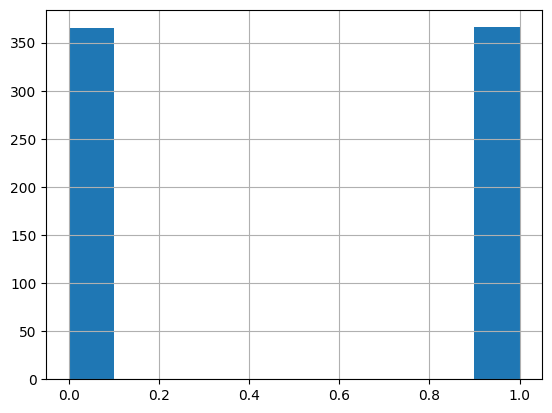

In [ ]:
day_data.yr.hist()

<Axes: >

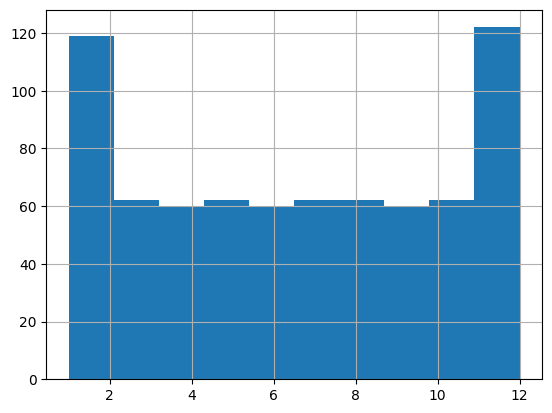

In [ ]:
day_data.mnth.hist()

In [ ]:
day_data.groupby(by= 'season').count()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,,,,,,,,,,,,,,,
1,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181
2,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184
3,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188
4,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178


In [ ]:
day_data.groupby(by= 'dteday').count()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2011-01-02,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2011-01-03,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2011-01-04,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2011-01-05,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2012-12-28,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2012-12-29,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
day_data.groupby(by=['season', 'dteday']).count()

instant  yr  mnth  holiday  weekday  workingday  \
season dteday                                                        
1      2011-01-01        1   1     1        1        1           1   
       2011-01-02        1   1     1        1        1           1   
       2011-01-03        1   1     1        1        1           1   
       2011-01-04        1   1     1        1        1           1   
       2011-01-05        1   1     1        1        1           1   
...                    ...  ..   ...      ...      ...         ...   
4      2012-12-16        1   1     1        1        1           1   
       2012-12-17        1   1     1        1        1           1   
       2012-12-18        1   1     1        1        1           1   
       2012-12-19        1   1     1        1        1           1   
       2012-12-20        1   1     1        1        1           1   

                   weathersit  temp  atemp  hum  windspeed  casual  \
season dteday                                                        
1      2011-01-01           1     1      1    1          1       1   
       2011-01-02           1     1      1    1          1       1   
       2011-01-03           1     1      1    1          1       1   
       2011-01-04           1     1      1    1          1       1   
       2011-01-05           1     1      1    1          1       1   
...                       ...   ...    ...  ...        ...     ...   
4      2012-12-16           1     1      1    1          1       1   
       2012-12-17           1     1      1    1          1       1   
       2012-12-18           1     1      1    1          1       1   
       2012-12-19           1     1      1    1          1       1   
       2012-12-20           1     1      1    1          1       1   

                   registered  cnt  
season dteday                       
1      2011-01-01           1    1  
       2011-01-02           1    1  
       2011-01-03           1    1  
       2011-01-04           1    1  
       2011-01-05           1    1  
...                       ...  ...  
4      2012-12-16           1    1  
       2012-12-17           1    1  
       2012-12-18           1    1  
       2012-12-19           1    1  
       2012-12-20           1    1  

[731 rows x 14 columns]

### Explore

>hour_data

In [ ]:
hour_data.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14718,14719,2012-09-10,3,1,9,11,0,1,1,1,0.62,0.6212,0.43,0.2985,69,167,236
11812,11813,2012-05-12,2,1,5,9,0,6,0,1,0.54,0.5152,0.49,0.0000,87,248,335
12888,12889,2012-06-26,3,1,6,5,0,2,1,1,0.52,0.5000,0.48,0.3881,3,36,39
10625,10626,2012-03-23,2,1,3,20,0,5,1,1,0.66,0.6212,0.47,0.1343,117,328,445
3756,3757,2011-06-10,2,0,6,10,0,5,1,1,0.78,0.7121,0.52,0.0000,23,88,111


In [ ]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


<Axes: >

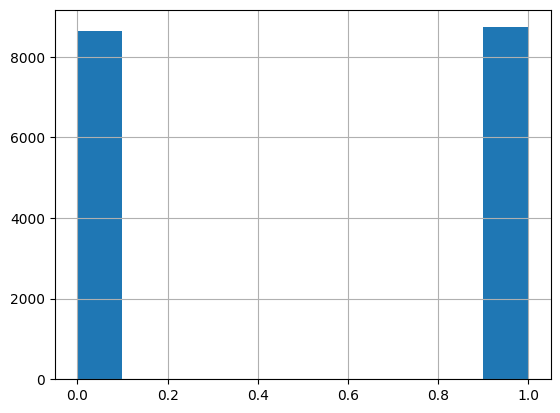

In [ ]:
hour_data.yr.hist()

<Axes: >

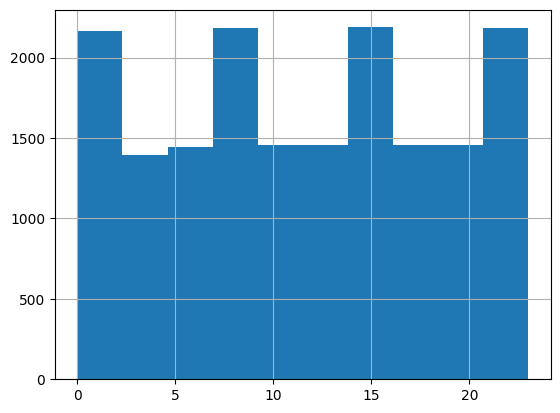

In [ ]:
hour_data.hr.hist()

In [ ]:
hour_data.groupby(by='hr').count()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
hr,,,,,,,,,,,,,,,,
0,726,726,726,726,726,726,726,726,726,726,726,726,726,726,726,726
1,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724
2,715,715,715,715,715,715,715,715,715,715,715,715,715,715,715,715
3,697,697,697,697,697,697,697,697,697,697,697,697,697,697,697,697
4,697,697,697,697,697,697,697,697,697,697,697,697,697,697,697,697
5,717,717,717,717,717,717,717,717,717,717,717,717,717,717,717,717
6,725,725,725,725,725,725,725,725,725,725,725,725,725,725,725,725
7,727,727,727,727,727,727,727,727,727,727,727,727,727,727,727,727
8,727,727,727,727,727,727,727,727,727,727,727,727,727,727,727,727


In [ ]:
hour_data.hr.duplicated().sum()

17355

In [ ]:
hour_data.season.value_counts()

,count
season,
3,4496
2,4409
1,4242
4,4232


In [ ]:
hour_data.hr.value_counts()

,count
hr,
17,730
16,730
13,729
15,729
14,729
12,728
22,728
21,728
20,728


In [ ]:
hour_data.groupby(by=['season', 'hr']).count()

instant  dteday   yr  mnth  holiday  weekday  workingday  \
season hr                                                             
1      0       178     178  178   178      178      178         178   
       1       178     178  178   178      178      178         178   
       2       170     170  170   170      170      170         170   
       3       156     156  156   156      156      156         156   
       4       154     154  154   154      154      154         154   
...            ...     ...  ...   ...      ...      ...         ...   
4      19      177     177  177   177      177      177         177   
       20      177     177  177   177      177      177         177   
       21      177     177  177   177      177      177         177   
       22      177     177  177   177      177      177         177   
       23      177     177  177   177      177      177         177   

           weathersit  temp  atemp  hum  windspeed  casual  registered  cnt  
season hr                                                                    
1      0          178   178    178  178        178     178         178  178  
       1          178   178    178  178        178     178         178  178  
       2          170   170    170  170        170     170         170  170  
       3          156   156    156  156        156     156         156  156  
       4          154   154    154  154        154     154         154  154  
...               ...   ...    ...  ...        ...     ...         ...  ...  
4      19         177   177    177  177        177     177         177  177  
       20         177   177    177  177        177     177         177  177  
       21         177   177    177  177        177     177         177  177  
       22         177   177    177  177        177     177         177  177  
       23         177   177    177  177        177     177         177  177  

[96 rows x 15 columns]

## Visualization & Explanatory Analysis

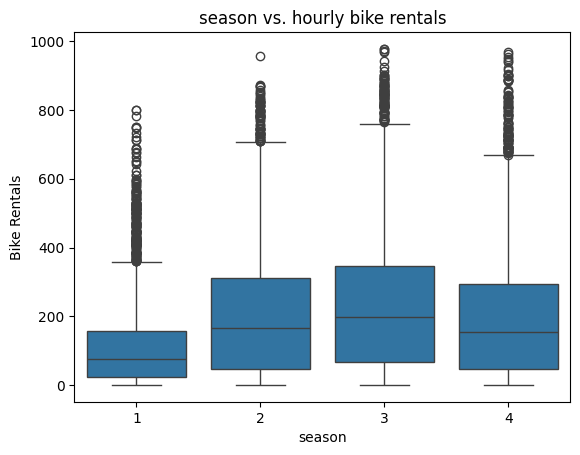

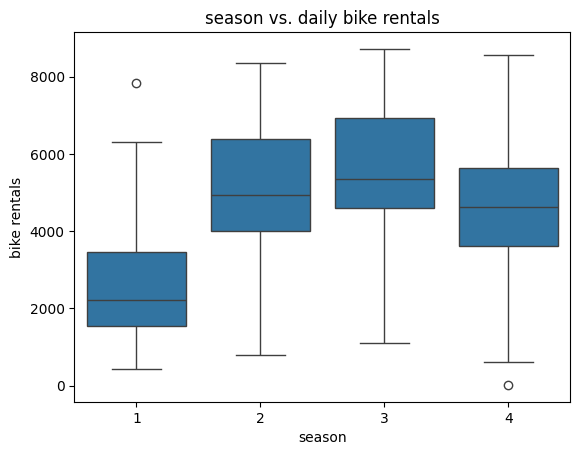

In [ ]:
#visualize the relationship between season adn bike rentals
sns.boxplot(x='season', y='cnt', data=hour_data)
plt.title('season vs. hourly bike rentals')
plt.xlabel('season')
plt.ylabel('Bike Rentals')
plt.show()

sns.boxplot(x='season', y='cnt', data=day_data)
plt.title('season vs. daily bike rentals')
plt.xlabel('season')
plt.ylabel('bike rentals')
plt.show()

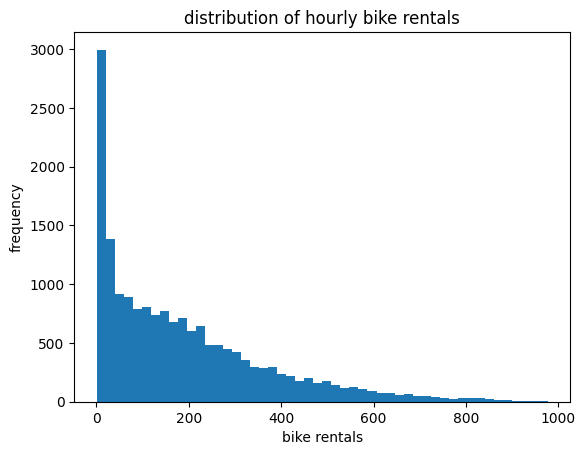

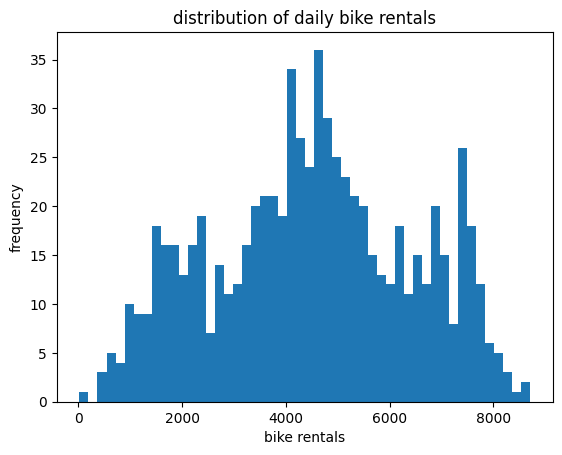

In [ ]:
plt.hist(hour_data['cnt'], bins=50)
plt.title('distribution of hourly bike rentals')
plt.xlabel('bike rentals')
plt.ylabel('frequency')
plt.show()

plt.hist(day_data['cnt'], bins=50)
plt.title('distribution of daily bike rentals')
plt.xlabel('bike rentals')
plt.ylabel('frequency')
plt.show()

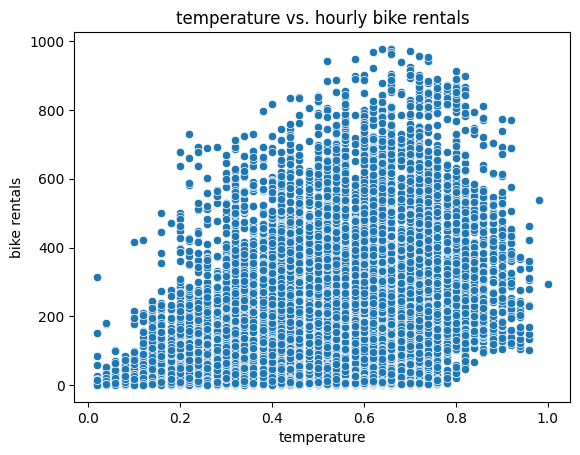

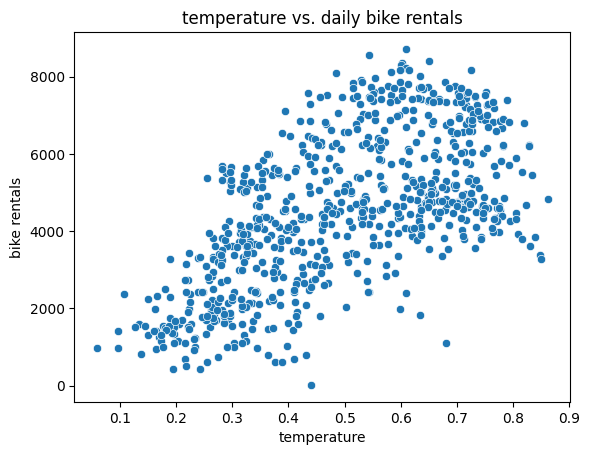

In [ ]:
sns.scatterplot(x='temp', y='cnt', data=hour_data)
plt.title('temperature vs. hourly bike rentals')
plt.xlabel('temperature')
plt.ylabel('bike rentals')
plt.show()

sns.scatterplot(x='temp', y='cnt', data=day_data)
plt.title('temperature vs. daily bike rentals')
plt.xlabel('temperature')
plt.ylabel('bike rentals')
plt.show()

### Pertanyaan 1:

In [ ]:
#create a linear regression model to predict hourly bike rentals based on temperature
x = hour_data[['temp']]
y = hour_data['cnt']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 26363.54


### Pertanyaan 2:

In [ ]:
#create linear regression model to predict daily bike rentals based on season
x = day_data[['season', 'temp']]
y = day_data['cnt']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 2222329.29


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-50-a47e075934a4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_data['cluster'] = kmeans.fit_predict(rfm_data[['temp', 'cnt']])


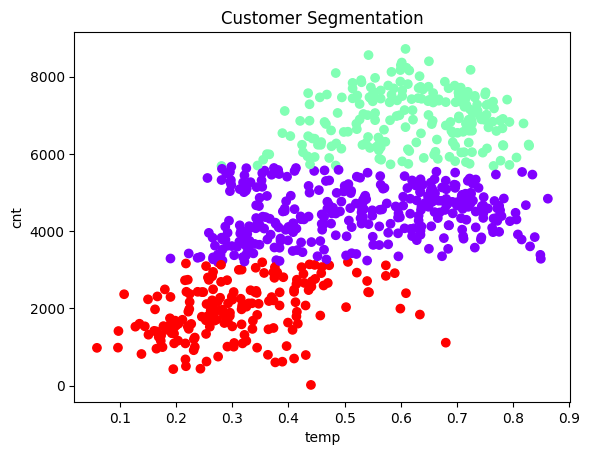

In [ ]:
from sklearn.cluster import KMeans

rfm_data = day_data[['temp', 'cnt']]
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_data['cluster'] = kmeans.fit_predict(rfm_data[['temp', 'cnt']])

plt.scatter(rfm_data['temp'], rfm_data['cnt'], c=rfm_data['cluster'], cmap='rainbow')
plt.xlabel('temp')
plt.ylabel('cnt')
plt.title('Customer Segmentation')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-51-09998fec4d08>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_data['cluster'] = kmeans.fit_predict(rfm_data)


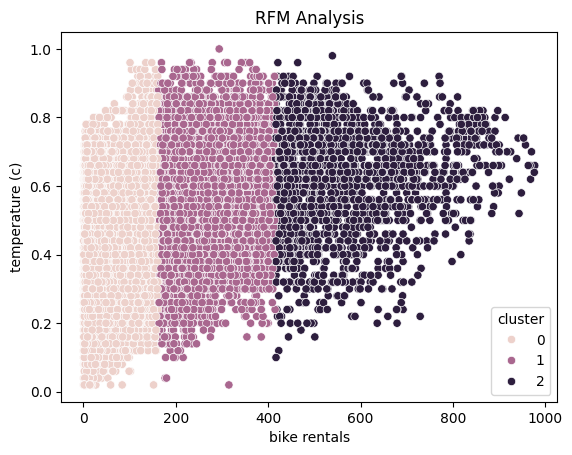

In [ ]:
from sklearn.cluster import KMeans

rfm_data = hour_data [['cnt', 'temp', 'season']]
kmeans = KMeans(n_clusters=3)
rfm_data['cluster'] = kmeans.fit_predict(rfm_data)

sns.scatterplot(x='cnt', y='temp', hue='cluster', data=rfm_data)
plt.title('RFM Analysis')
plt.xlabel('bike rentals')
plt.ylabel('temperature (c)')
plt.show()

## Conclusion

1. the weather, particularly temp, has a significant impact on bike rental count

2. we can predict the number of bike rentals based on environmental and seasonal sett with a reasonable degree of accurancy